# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

In [0]:
def p_drunk_pos(p_prior, p_true_positive, p_false_positive):
  return (p_true_positive * p_prior) / ((p_true_positive * p_prior) + (p_false_positive * (1 - p_prior)))

**What is the probability that a person is drunk after one positive breathalyzer test?**

In [41]:
test1 = p_drunk_pos(1/1000, 1, 0.08)
print(test1)

0.012357884330202669


**What is the probability that a person is drunk after two positive breathalyzer tests?**

In [42]:
test2 = p_drunk_pos(test1, 1, 0.08)
print(test2)

0.13525210993291495


**How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?**

In [0]:
# RECURSIVE BAYES FUNCTION UNTIL 'p' THRESHOLD MET
# RETURNS UPDATED P(A|B) PRIOR BELIEF AND 'n' ITERATIONS REQUIRED
def bayes_repeat(p_prior, p_true_positive, p_false_positive, p=0.05):
  n = 0
  while p_prior < (1 - p):
    n += 1
    p_prior = p_drunk_pos(p_prior, p_true_positive, p_false_positive)
  return (p_prior, n)

In [44]:
# 
bayes_repeat(1/1000, 1, 0.08)

(0.9606895076105054, 4)

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
votes = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
votes = votes.replace({'?':np.NaN, 'n':0, 'y':1})
democrat = votes[votes['party'] == 'democrat']
republican = votes[votes['party'] == 'republican']
republican = republican.fillna(0.5)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
#  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = (np.std(data, ddof=1) / np.sqrt(n))
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  moe = stderr * t
  return (mean, mean - moe, mean + moe)

(0.8422619047619048, 0.7907902004041876, 0.893733609119622)

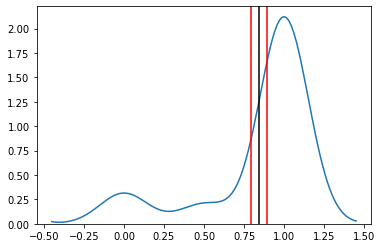

In [49]:
# FREQUENTIST PLOT
plot_data = republican['education']
sns.kdeplot(plot_data.values, bw=0.15)
ci = confidence_interval(plot_data)
plt.axvline(x=ci[1], color='red')
plt.axvline(x=ci[2], color='red')
plt.axvline(x=ci[0], color='k');
confidence_interval(republican['education'])

Mean(statistic=0.8422619047619048, minmax=(0.7991393039965766, 0.8853845055272329))

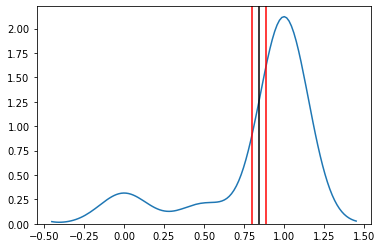

In [50]:
# BAYESIAN PLOT (p=0.10)
b_mean, _, _ = stats.bayes_mvs(republican['education'], alpha=0.90)
sns.kdeplot(plot_data.values, bw=0.15)
plt.axvline(x=b_mean[1][0], color='red')
plt.axvline(x=b_mean[1][1], color='red')
plt.axvline(x=ci[0], color='k');
b_mean

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).


**Frequentist**

Frequentist statistics determine statistical significance by testing the difference between the observed result and the expected result. If the probability the observed result/calculation is unlikely (*extreme*), beyond a certain threshold, the observed result is concluded to have been unlikely to have happened based on chance alone, and of significance

**Bayesian**

Bayesian statistics, differ from frequentist statistics, as they incorporate "prior belief" or a probability that some condition is true (or event will happen) in the overall population. The probability that some event A happend, given a condition B, depends on the probability A in general. When done iteratively, the probability of A given B, is then used to update the "prior belief" to be used in probabilities in the future.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!